# Commodities
A [commodity](https://en.wikipedia.org/wiki/Commodity) is a good whose price does not depend on who produced it. They can be divided in soft (e.g. crops) and hard (e.g. minerals) commodities. The price of a commodity depends on its availabilty that may be affected by many variables that can be difficult to forecast. For examples, the yield of crops depends on the precipitations, the fertilizers, the air temperatures, but also on natural, social and political events, such as floods and war, that may have an inpact on the crop production. Some [financial organizations](https://www.transtrend.com/en/) are specialized in tracking several commodities to profit from raising or falling prices using techniques such as [trend analysis](https://www.investopedia.com/terms/t/trendanalysis.asp) and [systematic trading](https://en.wikipedia.org/wiki/Systematic_trading) and financial and non-financial data, also known as [alternative data](https://en.wikipedia.org/wiki/Alternative_data_(finance)), about any event or predictor of the commodity's price. Some providers of commodities' prices are [Yahoo Finance](https://finance.yahoo.com/commodities/) and the International Monetary Fund ([IMF](https://www.imf.org/en/Data))

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import dates
import matplotlib.dates as mdates
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from osgeo import gdal, osr, ogr
import geopandas as gpd
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
from platform import python_version
print("Python version: %s"%python_version())
print("NumPy version: %s"%np.__version__)
print("Pandas version: %s"%pd.__version__)
print('GDAL version: %s'%gdal.__version__)
print("GeoPandas version: %s"%gpd.__version__)

Python version: 3.11.5
NumPy version: 1.25.2
Pandas version: 2.1.1
GDAL version: 3.7.2
GeoPandas version: 0.14.0


## Cocoa futures

In [3]:
path_cocoa_ds = 'data/Commodity_Cocoa_Futures.csv'
cocoa_df = pd.read_csv(path_cocoa_ds)
cocoa_df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1034,2024-02-09,5900.0,6030.0,5528.0,5888.0,5888.0,35319
1035,2024-02-12,5868.0,5958.0,5773.0,5860.0,5860.0,16137
1036,2024-02-13,5828.0,6029.0,5815.0,6001.0,6001.0,12137
1037,2024-02-14,6008.0,6039.0,5812.0,5949.0,5949.0,9014
1038,2024-02-15,5956.0,6030.0,5888.0,5961.0,5961.0,9014


In [5]:
day_index = pd.to_datetime(cocoa_df['Date'])
cocoa_df.drop(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)
cocoa_df.set_index(day_index, inplace=True)
cocoa_df.head(2)

,Close
Date,
2020-01-02,2532.0
2020-01-03,2519.0


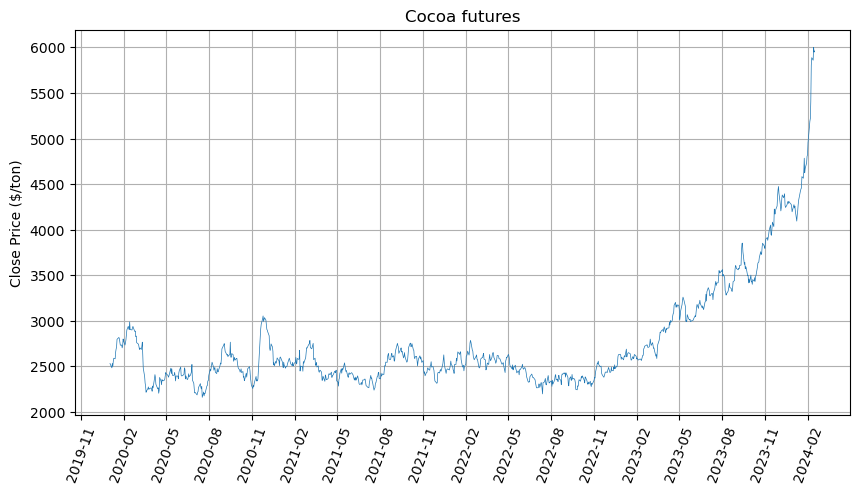

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.set_title('Cocoa futures')
ax.set_ylabel('Close Price ($/ton)')
ax.set_xticks(cocoa_df.index)
ax.set_xticklabels(cocoa_df.index, rotation=70)
ax.xaxis.set_major_locator(mdates.MonthLocator([2, 5, 8, 11]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt_cocoa = ax.plot(cocoa_df, linewidth=0.5, label='cocoa')
#plt.legend(loc='upper left')
plt.savefig('cocoa_fures.png')